In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc

import os
import sys

import tracemalloc

In [2]:
path = "/home/unix/sjohri/valab_sjohri/projects/beanie_private/"

In [3]:
sys.path.append("/home/unix/sjohri/valab_sjohri/projects/2_beanie_revision1/beanie/src")

In [4]:
import beanie_08112022.beanie as bn

# tracemalloc

In [5]:
tracemalloc.start()

In [6]:
bobj = bn.Beanie(counts_path = path+"/data/profiling_datasets/2patspergroup_100cellsperpat.h5ad", 
                 metad_path = path+"/data/profiling_datasets/2patspergroup_100cellsperpat.csv",
                 sig_path = path+"/data/signatures/test_small.gmt",
                 normalised = False, min_cells=50, bins=False, bin_size=20)

In [7]:
print(tracemalloc.get_traced_memory())

(88616792, 294792749)


In [8]:
print(tracemalloc.get_tracemalloc_memory()/(1024*1024*1024))

0.006400752812623978


In [9]:
bobj.SignatureScoring(scoring_method="beanie", no_random_sigs=1000)

  0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
print(tracemalloc.get_traced_memory())

(89581811, 505019152)


In [11]:
print(tracemalloc.get_tracemalloc_memory()/(1024*1024*1024))

0.006662614643573761


In [12]:
bobj.DifferentialExpression(test_name="mwu-test", subsamples=25)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
print(tracemalloc.get_traced_memory())

(106841720, 505019152)


In [25]:
106841720/(1024*1024)

101.89220428466797

In [14]:
print(tracemalloc.get_tracemalloc_memory()/(1024*1024*1024))

0.013225506991147995


In [15]:
tracemalloc.stop()

In [16]:
print(tracemalloc.get_traced_memory())

(0, 0)


# memory_profiler

In [19]:
from memory_profiler import memory_usage

In [21]:
def f():
    bobj = bn.Beanie(counts_path = path+"/data/profiling_datasets/2patspergroup_100cellsperpat.h5ad", 
                 metad_path = path+"/data/profiling_datasets/2patspergroup_100cellsperpat.csv",
                 sig_path = path+"/data/signatures/test_small.gmt",
                 normalised = False, min_cells=50, bins=False, bin_size=20)
    bobj.SignatureScoring(scoring_method="beanie", no_random_sigs=1000)
    bobj.DifferentialExpression(test_name="mwu-test", subsamples=25)

In [22]:
mem_usage = memory_usage(f)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
max(mem_usage)

863.93359375

In [39]:
np.mean(mem_usage)

530.5418424852256

In [26]:
import matplotlib.pyplot as plt

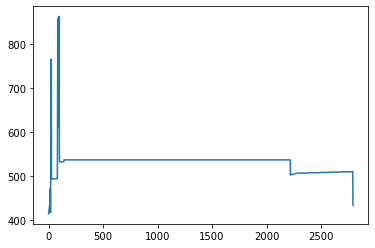

In [37]:
plt.plot(range(len(mem_usage)),mem_usage)
# plt.xlim(0,10000)
# plt.xscale("log")
# plt.yscale("log")

memory_profiler is better because also captures memory during the run and we can get a nice profile varying with time

should I combine timeit with memory_profiler to measure both time and memory at the same time?

look at this link for difference between wall time and CPU time - https://pynative.com/python-get-execution-time-of-program/

In [42]:
from time import process_time

In [43]:
# CPU time
t1_start = process_time() 
mem_usage = memory_usage(f)
t1_stop = process_time()
print("Elapsed time during the whole program in seconds:", t1_stop-t1_start)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Elapsed time during the whole program in seconds: 17.450565684000004


In [44]:
from time import time

In [45]:
# wall time
t1_start = time() 
mem_usage = memory_usage(f)
t1_stop = time()
print("Elapsed time during the whole program in seconds:", t1_stop-t1_start)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Elapsed time during the whole program in seconds: 288.1601221561432


In [51]:
def func(c_path, m_path):
    print(c_path, m_path)
    bobj = bn.Beanie(counts_path = c_path, 
                 metad_path = m_path,
                 sig_path = path+"/data/signatures/test_small.gmt",
                 normalised = False, min_cells=50, bins=False, bin_size=20)
    bobj.SignatureScoring(scoring_method="beanie", no_random_sigs=1000)
    bobj.DifferentialExpression(test_name="mwu-test", subsamples=25)

In [52]:
path = "/home/unix/sjohri/valab_sjohri/projects/beanie_private/"

In [54]:
mem_usage = memory_usage((func,
                          {path+"/data/profiling_datasets/2patspergroup_100cellsperpat.h5ad",
                           path+"/data/profiling_datasets/2patspergroup_100cellsperpat.csv"}))

/home/unix/sjohri/valab_sjohri/projects/beanie_private//data/profiling_datasets/2patspergroup_100cellsperpat.h5ad /home/unix/sjohri/valab_sjohri/projects/beanie_private//data/profiling_datasets/2patspergroup_100cellsperpat.csv


  0%|          | 0/1 [00:00<?, ?it/s]

Process Process-2363:
Process Process-2360:
Process MemTimer-2344:
Process Process-2366:
Process Process-2374:
Process Process-2353:
Process Process-2364:
Process Process-2358:
Process Process-2389:
Process Process-2370:
Process Process-2348:
Process Process-2352:
Process Process-2391:
Process Process-2350:
Process Process-2385:
Process Process-2346:
Process Process-2381:
Process Process-2393:
Process Process-2380:
Process Process-2387:
Process Process-2359:
Process Process-2390:
Process Process-2395:
Process Process-2386:
Process Process-2357:
Process Process-2372:
Process Process-2351:
Process Process-2371:
Process Process-2365:
Process Process-2375:
Process Process-2362:
Process Process-2367:
Process Process-2394:
Process Process-2347:
Process Process-2377:
Process Process-2369:
Process Process-2392:
Process Process-2379:
Process Process-2361:
Process Process-2349:
Process Process-2376:
Traceback (most recent call last):
Process Process-2388:
Traceback (most recent call last):
Trace

KeyboardInterrupt: 

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 677, in _get_impl
    impl, args = self._impl_cache[cache_key]
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 677, in _get_impl
    impl, args = self._impl_cache[cache_key]
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/num

KeyError: (<numba.core.typing.context.Context object at 0x2b4f5f9afa20>, (array(uint32, 1d, C),), ())
KeyError: (<numba.core.typing.context.Context object at 0x2b4f5f9afa20>, (array(uint32, 1d, C),), ())
KeyError: (<numba.core.typing.context.Context object at 0x2b4f5f9afa20>, (array(uint32, 1d, C),), ())
KeyError: (<numba.core.typing.context.Context object at 0x2b4f5f9afa20>, (array(uint32, 1d, C),), ())
KeyError: (<numba.core.typing.context.Context object at 0x2b4f5f9afa20>, (array(uint32, 1d, C),), ())
Traceback (most recent call last):
KeyError: (<numba.core.typing.context.Context object at 0x2b4f5f9afa20>, (array(uint32, 1d, C),), ())
KeyError: (<numba.core.typing.context.Context object at 0x2b4f5f9afa20>, (array(uint32, 1d, C),), ())
KeyError: (<numba.core.typing.context.Context object at 0x2b4f5f9afa20>, (array(uint32, 1d, C),), ())
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 677, in _get_impl
    


During handling of the above exception, another exception occurred:


During handling of the above exception, another exception occurred:


During handling of the above exception, another exception occurred:


During handling of the above exception, another exception occurred:


During handling of the above exception, another exception occurred:


During handling of the above exception, another exception occurred:


During handling of the above exception, another exception occurred:


During handling of the above exception, another exception occurred:

Traceback (most recent call last):

During handling of the above exception, another exception occurred:

Traceback (most recent call last):

During handling of the above exception, another exception occurred:

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 677, in _get_impl
    impl, args = self._impl_cache[cache_key]

During handling of the above exception,

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 677, in _get_impl
    impl, args = self._impl_cache[cache_key]
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 677, in _get_impl
    impl, args = self._impl_cache[cache_key]
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 677, in _get_impl
    impl, args = self._impl_cache[cache_key]
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 677, in _get_impl
    impl, args = self._impl_cache[cache_key]
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 677, in _get_impl
    impl, args = self._impl_cache[cache_key]
  File "/home/unix/sjohri/valab_sjohri/envs/beanie

KeyError: (<numba.core.typing.context.Context object at 0x2b4f5f9afa20>, (array(uint32, 1d, C), array(int64, 1d, C), int64, int64), ())
KeyError: (<numba.core.typing.context.Context object at 0x2b4f5f9afa20>, (array(uint32, 1d, C), array(int64, 1d, C), int64, int64), ())
KeyError: (<numba.core.typing.context.Context object at 0x2b4f5f9afa20>, (array(uint32, 1d, C), array(int64, 1d, C), int64, int64), ())
KeyError: (<numba.core.typing.context.Context object at 0x2b4f5f9afa20>, (array(uint32, 1d, C), array(int64, 1d, C), int64, int64), ())
KeyError: (<numba.core.typing.context.Context object at 0x2b4f5f9afa20>, (array(uint32, 1d, C),), ())
KeyError: (<numba.core.typing.context.Context object at 0x2b4f5f9afa20>, (array(uint32, 1d, C),), ())
KeyError: (<numba.core.typing.context.Context object at 0x2b4f5f9afa20>, (array(uint32, 1d, C), array(int64, 1d, C), int64, int64), ())

During handling of the above exception, another exception occurred:

KeyError: (<numba.core.typing.context.Context 

Traceback (most recent call last):
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
KeyError: (<numba.core.typing.context.Context object at 0x2b4f5f9afa20>, (array(uint32, 1d, C),), ())
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 677, in _get_impl
    impl, args = self._impl_cache[cache_key]
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/multiprocessing/process.py", 

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 265, in auc2d
    aucs[row_idx] = weighted_auc1d(rankings[row_idx, :], weights, rank_cutoff, max_auc)
  File "/home/unix/sj

  File "/home/unix/sjohri/valab_sjohri/projects/2_beanie_revision1/beanie/src/beanie_08112022/scoring_aucell.py", line 86, in _enrichment
    df_rnk, module, auc_threshold
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
KeyError: b'PYCHARM_HOSTED'
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/unix/sjohri/valab_sjohri/projects/2_beanie_revision1/beanie/src/beanie_08112022/scoring_aucell.py", line 86, in _enrichment
    df_rnk, module, auc_threshold

During handling of the above exception, another exception occurred:

  File "/home/unix/sjohri/valab_sjohri/projects/2_beanie_rev

  File "/home/unix/sjohri/valab_sjohri/projects/2_beanie_revision1/beanie/src/beanie_08112022/scoring_aucell.py", line 86, in _enrichment
    df_rnk, module, auc_threshold
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 113, in enrichment4cells
    return pd.DataFrame(index=index, data={"AUC": aucs(rnk, total_genes, weights, auc_threshold)})
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 113, in enrichment4cells
    return pd.DataFrame(index=index, data={"AUC": aucs(rnk, total_genes, weights, auc_threshold)})
Traceback (most recent call last):
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 113, in enrichment4cells
    return pd.DataFrame(index=index, data={"AUC": aucs(rnk, total_genes, weights, auc_threshold)})
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 113, in enrichment4cells
    return pd.DataFrame(index=index, data={"AUC": aucs(rnk, total_genes, weights, auc_threshold)})
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 289, in aucs
    return auc2d(rankings, weights, rank_cutoff, maxauc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 289, in aucs
    return auc2d(rankings, weights, rank_cutoff, maxauc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 289, in aucs
    return auc2d(rankings, weights, rank_cutoff, maxauc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revision

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 265, in auc2d
    aucs[row_idx] = weighted_auc1d(rankings[row_idx, :], weights, rank_cutoff, max_auc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 289, in aucs
    return auc2d(rankings, weights, rank_cutoff, maxauc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 289, in aucs
    return auc2d(rankings, weights, rank_cutoff, maxauc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 265, in auc2d
    aucs[row_idx] = weighted_auc1d(rankings[row_idx, :], weights, rank_cutoff, max_auc)
  File "/home/unix/sjohri/valab_sjohri/envs/beani

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 367, in _compile_for_args
    return self.compile(tuple(argtypes))
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 265, in auc2d
    aucs[row_idx] = weighted_auc1d(rankings[row_idx, :], weights, rank_cutoff, max_auc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 265, in auc2d
    aucs[row_idx] = weighted_auc1d(rankings[row_idx, :], weights, rank_cutoff, max_auc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 92, in _compile_cached
    retval = self._compile_core(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 367, in _compile_for_args
    return self.compile(tuple(argt

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 113, in enrichment4cells
    return pd.DataFrame(index=index, data={"AUC": aucs(rnk, total_genes, weights, auc_threshold)})
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 367, in _compile_for_args
    return self.compile(tuple(argtypes))
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 265, in auc2d
    aucs[row_idx] = weighted_auc1d(rankings[row_idx, :], weights, rank_cutoff, max_auc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 367, in _compile_for_args
    return self.compi

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 113, in enrichment4cells
    return pd.DataFrame(index=index, data={"AUC": aucs(rnk, total_genes, weights, auc_threshold)})
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 289, in aucs
    return auc2d(rankings, weights, rank_cutoff, maxauc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 819, in compile
    cres = self._compiler.compile(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 819, in compile
    cres = self._compiler.compile(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 819, in compile
    cres = self._compiler.compile(args, return_type)
  Fi

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 819, in compile
    cres = self._compiler.compile(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 78, in compile
    status, retval = self._compile_cached(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 289, in aucs
    return auc2d(rankings, weights, rank_cutoff, maxauc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 819, in compile
    cres = self._compiler.compile(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 367, in _compile_for_args
    return self.compile(tuple(argtypes))
  File "/home/unix/sjohri/valab_sjohri/envs/beani

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 78, in compile
    status, retval = self._compile_cached(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/ctxcore/recovery.py", line 265, in auc2d
    aucs[row_idx] = weighted_auc1d(rankings[row_idx, :], weights, rank_cutoff, max_auc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 78, in compile
    status, retval = self._compile_cached(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 367, in _compile_for_args
    return self.compile(tuple(argtypes))
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 92, in _compile_cached
    retval = self._compile_core(args, return_type)
  Fil

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 367, in _compile_for_args
    return self.compile(tuple(argtypes))
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 367, in _compile_for_args
    return self.compile(tuple(argtypes))
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 92, in _compile_cached
    retval = self._compile_core(args, return_type)
KeyError: '.const.pickledata.47620339807144'
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 92, in _compile_cached
    retval = self._compile_core(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 92, in _compile_cached
    retval = self._compile_core(args, return_

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-pa

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 819, in compile
    cres = self._compiler.compile(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-pack

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 819, in compile
    cres = self._compiler.compile(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/n

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 39

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 442, in run_pass
    N

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjo

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py"

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 442, in run_pass
    NativeLowering().run_pass(state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 33

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 370, in run_pass
    lower.lower()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 442, in run_pass
    NativeLowering().run_pass(state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 370, in run_pass
    lower.lower()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 442, in run_pass
    NativeLowering().run_pass(state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
  

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 370, in run_pass
    lower.lower()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 370, in run_pass
    lower.lower()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 136, in lower
    self.lower_normal_function(self.fndesc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 136, in lower
    self.lower_normal_function(self.fndesc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 370, in run_pass
    lower.lower()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*ar

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 136, in lower
    self.lower_normal_function(self.fndesc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 190, in lower_normal_function
    entry_block_tail = self.lower_function_body()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 136, in lower
    self.lower_normal_function(self.fndesc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 190, in lower_normal_function
    entry_block_tail = self.lower_function_body()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/pytho

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 190, in lower_normal_function
    entry_block_tail = self.lower_function_body()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 190, in lower_normal_function
    entry_block_tail = self.lower_function_body()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 190, in lower_normal_function
    entry_block_tail = self.lower_function_body()
  File "/home/unix/sjohri/valab_sjohri/envs/bea

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 216, in lower_function_body
    self.lower_block(block)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 442, in run_pass
    NativeLowering().run_pass(state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 216, in lower_function_body
    self.lower_block(block)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 442, in run_pass
    NativeLowering().run_pass(state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py",

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 370, in run_pass
    lower.lower()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 230, in lower_block
    self.lower_inst(inst)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 230, in lower_block
    self.lower_inst(inst)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 370, in run_pass
    lower.lower()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 230, in lower_block
    self.lower_inst(inst)
  File "

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 136, in lower
    self.lower_normal_function(self.fndesc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 136, in lower
    self.lower_normal_function(self.fndesc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 327, in lower_inst
    val = self.lower_assign(ty, inst)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 327, in lower_inst
    val = self.lower_assign(ty, inst)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", lin

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 502, in lower_assign
    return self.lower_expr(ty, value)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 502, in lower_assign
    return self.lower_expr(ty, value)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 502, in lower_assign
    return self.lower_expr(ty, value)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 190, in lower_normal_function
    entry_block_tail = self.lower_function_body()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 502, in lower_assign
    return self.lower_expr(ty, value)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 502, in lower_assign
    return self.lower_expr(ty, value)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 1027, in lower_expr
    res = self.lower_call(resty, expr)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 216, in lower_function_body
    self.lower_block(block)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 1027, in lower_expr
    res = self.lower_call(resty, expr)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 1027, in lower_expr
    res = self.lower_call(resty, expr)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py",

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 216, in lower_function_body
    self.lower_block(block)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 1027, in lower_expr
    res = self.lower_call(resty, expr)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 1027, in lower_expr
    res = self.lower_call(resty, expr)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 1027, in lower_expr
    res = self.lower_call(resty, expr)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 764, in lower_call
    res = self._lower_call_normal(fnty, expr, signature)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/c

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 884, in compile_internal
    cres = self.compile_subroutine(builder, impl, sig, locals)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 998, in _lower_call_normal
    res = impl(self.builder, argvals, self.loc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 998, in _lower_call_normal
    res = impl(self.builder, argvals, self.loc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 998, in _lower_call_normal
    res = impl(self.builder, argvals, self.loc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 230, in lower_block
    self.lower_inst(inst)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 1164, in __call__
    res = self._imp(self._context, builder, self._sig, args, loc=loc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 998, in _lower_call_normal
    res = impl(self.builder, argvals, self.loc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 998, in _lower_call_normal
    res = impl(self.builder, argvals, self.loc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 502, in lower_assign
    return self.lower_expr(ty, value)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 998, in _lower_call_normal
    res = impl(self.builder, argvals, self.loc)
  File "/home/unix/sjohri/valab_sjohr

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 1194, in wrapper
    return fn(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 1194, in wrapper
    return fn(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 1027, in lower_expr
    res = self.lower_call(resty, expr)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 1164, in __call__
    res = self._imp(self._context, builder, self._sig, args, loc=loc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 998, in _lower_call_normal
    res = impl(self.builder, argvals, self.loc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/np/arrayobj.py", line 5037, in array_argsort
    innersig, innerargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/np/arrayobj.py", line 5037, in array_argsort
    innersig, innerargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/np/arrayobj.py", line 5037, in array_argsort
    innersig, innerargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/np/arrayobj.py", line 5037, in array_argsort
    innersig, innerargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 764, in lower_call
    res = self._lower_call_normal(fnty, expr, signature)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 1194, in wrapper
    return fn

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 998, in _lower_call_normal
    res = impl(self.builder, argvals, self.loc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 884, in compile_internal
    cres = self.compile_subroutine(builder, impl, sig, locals)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 884, in compile_internal
    cres = self.compile_subroutine(builder, impl, sig, locals)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 884, in compile_internal
    cres = self.compile_subroutine(builder, impl, sig, locals)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 884, in compile_internal
    cres = self.compile_subroutine(builder, impl, sig, lo

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 884, in compile_internal
    cres = self.compile_subroutine(builder, impl, sig, locals)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 1194, in wrapper
    return fn(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 998, in _lower_call_normal
    res = impl(self.builder, argvals, self.loc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 998, in _lower_call_normal
    res = impl(self.builder, argvals, self.loc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 1164, in __call__
    res = self._imp(self._context, builder, self._sig, args, loc=loc)
  File "/home/unix/sjohri/valab_sjohri/envs

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 844, in _compile_subroutine_no_cache
    locals=locals)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 871, in compile_subroutine
    flags=flags)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 844, in _compile_subroutine_no_cache
    locals=locals)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 871, in compile_subroutine
    flags=flags)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 1164, in __call__
    res = self._imp(self._context, builder, self._sig, args, loc=loc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/np/arrayobj.py", line 5037, in array_argso

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 701, in compile_internal
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 701, in compile_internal
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 844, in _compile_subroutine_no_cache
    locals=locals)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 701, in compile_internal
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 844, in _compile_subroutine_no_cache
    locals=locals)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.p

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 884, in compile_internal
    cres = self.compile_subroutine(builder, impl, sig, locals)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 701, in compile_internal
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 701, in compile_internal
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 884, in compile_internal
    cres = self.compile_subroutine(builder, impl, sig, locals)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 871, in compile_subroutine
    flags=flags)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compile

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 871, in compile_subroutine
    flags=flags)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 871, in compile_subroutine
    flags=flags)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 844, in _compile_subroutine_no_cache

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 844, in _compile_subroutine_no_cache
    locals=locals)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 844, in _compile_subroutine_no_cache
    locals=locals)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 701, in compile_internal
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 764, in lower_call
    res = self._lower_call_normal(fnty, expr, signature)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/pytho

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revi

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_rev

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 98, in run_pass
    raise_errors=self._raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 98, in run_pass
    raise_errors=self._raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 98, in run_pass
    raise_errors=self._raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 586, in resolve
    sig = typeinfer.resolve_call(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/bean

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1063, in propagate
    errors = self.constraints.propagate(self)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 98, in run_pass
    raise_errors=self._raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/b

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154, in propagate
    constraint(typeinfer)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154, in propagate
    constraint(typeinfer)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154, in propagate
    constraint(typeinfer)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154, in propagate
    constraint(typeinfer)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1063, in propagate
    errors = self.constrain

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 98, in run_pass
    raise_errors=self._raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 566, in __call__
    self.resolve(typeinfer, typevars, fnty)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 566, in __call__
    self.resolve(typeinfer, typevars, fnty)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 566, in __call__
    self.resolve(typeinfer, typevars, fnty)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 566, in __call__
    self.resolve(typeinfer, typevars, fnty)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 98, in run_pass
    raise_errors=self._raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 98, in run_pass
    raise_errors=self._raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 98, in run_pass
    raise_errors=self._raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 586, in resolve
    sig = typeinfer.resolve_call(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1536, in resolve_call
    return self.context.resolve_function_type(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 586, in resolve
    sig = typeinfer.resolve_call(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1536, in resolve_call
    return self.context.resolve_function_type(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 586, in resolve
    sig = typeinfer.resolve_call(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=ra

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1536, in resolve_call
    return self.context.resolve_function_type(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1063, in propagate
    errors = self.constraints.propagate(self)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1536, in resolve_call
    return self.context.resolve_function_type(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1063, in propagate
    errors = self.constraints.propagate(self)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1536, in resolve_call
    return self.context.resolve_function_type(fnty, pos_args, 

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 194, in resolve_function_type
    res = self._resolve_user_function_type(func, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154, in propagate
    constraint(typeinfer)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154, in propagate
    constraint(typeinfer)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 194, in resolve_function_type
    res = self._resolve_user_function_type(func, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154, in propagate
    constraint(typeinfer)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 566, in __call__
    self.resolve(typeinfer, typevars, fnty)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 194, in resolve_function_type
    res = self._resolve_user_function_type(func, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 194, in resolve_function_type
    res = self._resolve_user_function_type(func, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 194, in resolve_function_type
    res = self._resolve_user_function_type(func, args, kws)
  File "/h

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 246, in _resolve_user_function_type
    return func.get_call_type(self, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 246, in _resolve_user_function_type
    return func.get_call_type(self, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 246, in _resolve_user_function_type
    return func.get_call_type(self, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 586, in resolve
    sig = typeinfer.resolve_call(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 740, in _build_impl
    disp_type.get_call_type(self.co

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 345, in apply
    sig = generic(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 345, in apply
    sig = generic(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1536, in resolve_call
    return self.context.resolve_function_type(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 298, in get_call_type
    sig = temp.apply(nolitargs, nolitkws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 246, in _resolve_user_function_type
    return func.get_call_type(self, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beani

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 194, in resolve_function_type
    res = self._resolve_user_function_type(func, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1536, in resolve_call
    return self.context.resolve_function_type(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 597, in generic
    disp, new_args = self._get_impl(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 597, in generic
    disp, new_args = self._get_impl(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 597, in generic
    disp, new_args = self._get_impl(args, kws)
  

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 679, in _get_impl
    impl, args = self._build_impl(cache_key, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 597, in generic
    disp, new_args = self._get_impl(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 679, in _get_impl
    impl, args = self._build_impl(cache_key, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 597, in generic
    disp, new_args = self._get_impl(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 679, in _get_impl
    impl, args = self._build_impl(cache_key, args, kws)
  File "/home/uni

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 679, in _get_impl
    impl, args = self._build_impl(cache_key, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 679, in _get_impl
    impl, args = self._build_impl(cache_key, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 679, in _get_impl
    impl, args = self._build_impl(cache_key, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 246, in _resolve_user_function_type
    return func.get_call_type(self, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 679, in _get_impl
    impl, args = self._build_impl(cache_key,

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 298, in get_call_type
    sig = temp.apply(nolitargs, nolitkws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 98, in run_pass
    raise_errors=self._raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 740, in _build_impl
    disp_type.get_call_type(self.context, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 740, in _build_impl
    disp_type.get_call_type(self.context, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 298, in get_call_type
    sig = temp.apply(nolitargs, nolitkws)
  File "/home/unix/sjohri/valab_sjohri/envs/

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 740, in _build_impl
    disp_type.get_call_type(self.context, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 740, in _build_impl
    disp_type.get_call_type(self.context, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 511, in get_call_type
    self.dispatcher.get_call_template(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 511, in get_call_type
    self.dispatcher.get_call_template(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 345, in apply
    sig = generic(args, kws)
  File "/home/unix/sjohri/valab_sjoh

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 312, in get_call_template
    self.compile(tuple(args))
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 312, in get_call_template
    self.compile(tuple(args))
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 345, in apply
    sig = generic(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 597, in generic
    disp, new_args = self._get_impl(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 511, in get_call_type
    self.dispatcher.get_call_template(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 312, in get_call_template
    self.compile(tuple(args))
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 679, in _get_impl
    impl, args = self._build_impl(cache_key, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/py

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 740, in _build_impl
    disp_type.get_call_type(self.context, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 819, in compile
    cres = self._compiler.compile(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 312, in get_call_template
    self.compile(tuple(args))
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 78, in compile
    status, retval = self._compile_cached(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 78, in compile
    status, retval = self._compile_cached(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 78, in compile
    status, retval = self._compile_cached(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 78, in compile
    status, retval = self._compile_cached(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 78, in compile
    status, retval = self._compile_cached(args, return_type)
  File "/home/u

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 78, in compile
    status, retval = self._compile_cached(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 511, in get_call_type
    self.dispatcher.get_call_template(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 312, in get_call_template
    self.compile(tuple(args))
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 511, in get_call_type
    self.dispatcher.get_call_template(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/be

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 92, in _compile_cached
    retval = self._compile_core(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 92, in _compile_cached
    retval = self._compile_core(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisio

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 246, in _resolve_user_function_type
    return func.get_call_type(self, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 819, in compile
    cres = self._compiler.compile(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revision

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 78, in compile
    status, retval = self._compile_cached(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 78, in compile
    status, retval = self._compile_cached(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 298, in get_call_type
    sig = temp.apply(nolitargs, nolitkws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/l

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 92, in _compile_cached
    retval = self._compile_core(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/co

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 1

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/py

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-pac

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compi

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 98, in run_pass
    raise_errors=self._raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 98, in run_pass
    raise_errors=self._raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 98, in run_pass
    raise_errors=self._raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 98, in run_pass
    raise_errors=self._raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 98, in run_pass
    raise_errors=self._raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.p

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=raise_errors)
  File "/h

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1063, in propagate
    errors = self.constraints.propagate(self)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/py

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1063, in propagate
    errors = self.constraints.propagate(self)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154, in propagate
    constraint(typeinfer)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154, in propagate
    constraint(typeinfer)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1063, in propagate
    errors = self.constraints.propagate(self)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154,

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154, in propagate
    constraint(typeinfer)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154, in propagate
    constraint(typeinfer)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 98, in run_pass
    raise_errors=self._raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 566, in __call__
    self.resolve(typeinfer, typevars, fnty)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 566, in __call__


  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 566, in __call__
    self.resolve(typeinfer, typevars, fnty)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 566, in __call__
    self.resolve(typeinfer, typevars, fnty)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 566, in __call__
    self.resolve(typeinfer, typevars, fnty)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 566, in __call__
    self.resolve(typeinfer, typevars, fnty)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 566, in __call__
    self.resolve(typeinfer, typevars, fnty)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 586, in resolve
    sig = typeinfer.resolve_call(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 586, in resolve
    sig = typeinfer.resolve_call(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 586, in resolve
    sig = typeinfer.resolve_call(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 586, in resolve
    sig = typeinfer.resolve_call(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 586, in resolve
    sig = typeinfer.resolve_call(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1536, in resolve_call
    return self.context.resolve_function_type(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1063, in propagate
    errors = self.constraints.propagate(self)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1536, in resolve_call
    return self.context.resolve_function_type(fnty, pos_args, kw_args)
 

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154, in propagate
    constraint(typeinfer)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 272, in _select
    **options)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 194, in resolve_function_type
    res = self._resolve_user_function_type(func, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 194, in resolve_function_type
    res = self._resolve_user_function_type(func, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 194, in resolve_function_type
    res = self._resolve_user_function_type(func, args, kws)
  File "/home/unix/sjohri/valab_s

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 246, in _resolve_user_function_type
    return func.get_call_type(self, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 566, in __call__
    self.resolve(typeinfer, typevars, fnty)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1536, in resolve_call
    return self.context.resolve_function_type(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/utils.py", line 103, in erase_traceback
    traceback.clear_frames(exc_value.__traceback__)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 194, in resolve_function_type
    res = self._resolve_user_function_type(func, ar

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 566, in __call__
    self.resolve(typeinfer, typevars, fnty)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 298, in get_call_type
    sig = temp.apply(nolitargs, nolitkws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 298, in get_call_type
    sig = temp.apply(nolitargs, nolitkws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 298, in get_call_type
    sig = temp.apply(nolitargs, nolitkws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 298, in get_call_type
    sig = temp.apply(nolitargs, nolitkws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revision

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 298, in get_call_type
    sig = temp.apply(nolitargs, nolitkws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 586, in resolve
    sig = typeinfer.resolve_call(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 194, in resolve_function_type
    res = self._resolve_user_function_type(func, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 298, in get_call_type
    sig = temp.apply(nolitargs, nolitkws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1536, in resolve_call
    return self.context.resolve_function_type(fnty, pos_args, kw_args

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 597, in generic
    disp, new_args = self._get_impl(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 345, in apply
    sig = generic(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 597, in generic
    disp, new_args = self._get_impl(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 345, in apply
    sig = generic(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1536, in resolve_call
    return self.context.resolve_function_type(fnty, pos_args, kw_args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/py

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 597, in generic
    disp, new_args = self._get_impl(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 597, in generic
    disp, new_args = self._get_impl(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 246, in _resolve_user_function_type
    return func.get_call_type(self, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 679, in _get_impl
    impl, args = self._build_impl(cache_key, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 679, in _get_impl
    impl, args = self._build_impl(cache_key, args, kws)
  File "/h

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 679, in _get_impl
    impl, args = self._build_impl(cache_key, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 679, in _get_impl
    impl, args = self._build_impl(cache_key, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 246, in _resolve_user_function_type
    return func.get_call_type(self, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 679, in _get_impl
    impl, args = self._build_impl(cache_key, args, kws)
  File "/ho

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 740, in _build_impl
    disp_type.get_call_type(self.context, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 298, in get_call_type
    sig = temp.apply(nolitargs, nolitkws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 740, in _build_impl
    disp_type.get_call_type(self.context, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 298, in get_call_type
    sig = temp.apply(nolitargs, nolitkws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 740, in _build_impl
    disp_type.get_call_type(self.context, args, kws)
  File "/home/unix/s

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 298, in get_call_type
    sig = temp.apply(nolitargs, nolitkws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 740, in _build_impl
    disp_type.get_call_type(self.context, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 740, in _build_impl
    disp_type.get_call_type(self.context, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 511, in get_call_type
    self.dispatcher.get_call_template(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 511, in get_call_type
    self.dispatcher.get_call_template(args, kws)
  File "/home/un

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 312, in get_call_template
    self.compile(tuple(args))
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/abc.py", line 180, in __instancecheck__
    def __instancecheck__(cls, instance):
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 597, in generic
    disp, new_args = self._get_impl(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 345, in apply
    sig = generic(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 511, in get_call_type
    self.dispatcher.get_call_template(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/fun

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 679, in _get_impl
    impl, args = self._build_impl(cache_key, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
KeyboardInterrupt
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 679, in _get_impl
    impl, args = self._build_impl(cache_key, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 597, in generic
    disp, new_args = self._get_impl(args, kws)
  File "/home/unix

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 819, in compile
    cres = self._compiler.compile(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 740, in _build_impl
    disp_type.get_call_type(self.context, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 740, in _build_impl
    disp_type.get_call_type(self.context, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 819, in compile
    cres = self._compiler.compile(args, return_type)
  File "/home/unix/sjohri/valab_sj

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 511, in get_call_type
    self.dispatcher.get_call_template(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 819, in compile
    cres = self._compiler.compile(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 819, in compile
    cres = self._compiler.compile(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 78, in compile
    status, retval = self._compile_cached(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/e

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 92, in _compile_cached
    retval = self._compile_core(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 92, in _compile_cached
    retval = self._compile_core(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 92, in _compile_cached
    retval = self._compile_core(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 312, in get_call_template
    self.compile(tuple(args))
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 819, in compile
    cres = self._compiler.compile(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/bean

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packa

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 363, in compile_extra
    return self._compile_bytecode()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", l

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", l

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 396, in _compile_core
    pm.run(self.state)
  File "/home/un

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/n

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/pytho

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/u

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 425, in _compile_bytecode
    return self._compile_core()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_ma

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 442, in run_pass
    NativeLowering().run_pass(state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 442, in run_pass
    NativeLowering().run_pass(state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 98, in run_pass
    raise_errors=self._raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 442, in run_pass
    NativeLowering().run_pass(state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 442, in run_pass
    NativeLowering().run_pass(state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py"

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 370, in run_pass
    lower.lower()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 370, in run_pass
    lower.lower()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 370, in run_pass
    lower.lower()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 370, in run_pass
    lower.lower()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 370, in run_pass
    lower.lower()
  File "/hom

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1063, in propagate
    errors = self.constraints.propagate(self)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 136, in lower
    self.lower_normal_function(self.fndesc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 136, in lower
    self.lower_normal_function(self.fndesc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 174, in lower
    self.library.add_ir_module(self.module)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1063, in propagate
    errors = self.constraints.propagate(self)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154, in propagate
    constraint(typeinfer)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 190, in lower_normal_function
    entry_block_tail = self.lower_function_body()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 190, in lower_normal_function
    entry_block_tail = self.lower_function_body()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/codegen.py", line 205, in add_ir_module
    ir = cgutils.normalize_ir_text(str(ir_module))
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/postproc.py", line 43, in usedefs
    return analysis.compute_use_defs(self._blocks)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/l

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 771, in __call__
    sig = typeinfer.context.resolve_setitem(targetty, idxty, valty)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 216, in lower_function_body
    self.lower_block(block)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 216, in lower_function_body
    self.lower_block(block)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/llvmlite/ir/module.py", line 242, in __repr__
    lines += self._get_body_lines()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/analysis.py", line 50, in compute_use_defs
    def_set.add(stmt.target.name)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/co

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 230, in lower_block
    self.lower_inst(inst)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/llvmlite/ir/module.py", line 212, in _get_body_lines
    lines += [str(v) for v in self.globals.values()]
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 586, in resolve
    sig = typeinfer.resolve_call(fnty, pos_args, kw_args)
KeyboardInterrupt
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/codegen.py", line 506, in get_pointer_to_function
    self._ensure_finalized()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 70, in type_inference_stage
    infer.propagate(raise_errors=raise_errors)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 1063, in propagate
    errors = self.constraints.propagate(self)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/codegen.py", line 125, in _ensure_finalized
    self.finalize()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/analysis.py", line 52, in compute_use_defs
    for var in stmt.list_vars():
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/pythonapi.py", line 1323, in unserialize
    ptr = self.builder.extract_value(self.builder.load(structptr), 0)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/controlflow.py", line 400, in _eliminate_dead_blocks
    for node in self._dfs():
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-pa

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154, in propagate
    constraint(typeinfer)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154, in propagate
    constraint(typeinfer)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/ir.py", line 313, in _rec_list_vars
    def _rec_list_vars(self, val):
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 1297, in delvar
    self.decref(fetype, self.builder.load(ptr))
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/rewrites/static_getitem.py", line 154, in match
    const = func_ir.infer_constant(inst.index)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 154

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 246, in _resolve_user_function_type
    return func.get_call_type(self, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/ir.py", line 321, in _rec_list_vars
    elif isinstance(val, (list, tuple)):
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 1011, in lower_expr
    return self.lower_binop(resty, expr, expr.immutable_fn)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/llvmlite/ir/module.py", line 242, in __repr__
    lines += self._get_body_lines()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/ir.py", line 320, in _rec_list_vars
    return val.list_vars()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-pa

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 764, in lower_call
    res = self._lower_call_normal(fnty, expr, signature)
KeyboardInterrupt
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/codegen.py", line 145, in _optimize_final_module
    self._codegen._mpm.run(self._final_module)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 297, in get_call_type
    for k, v in kws.items()}
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/base.py", line 1164, in __call__
    res = self._imp(self._context, builder, self._sig, args, loc=loc)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/llvmlite/ir/instructions.py", line 416, in __init__
    [val, ptr])
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_rev

KeyboardInterrupt
KeyboardInterrupt
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 194, in resolve_function_type
    res = self._resolve_user_function_type(func, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 194, in resolve_function_type
    res = self._resolve_user_function_type(func, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 194, in resolve_function_type
    res = self._resolve_user_function_type(func, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/runtime/context.py", line 193, in get_meminfos
    inner_meminfos = self.get_meminfos(builder, mtyp, field)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/errors.py",

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/np/arrayobj.py", line 414, in _getitem_array_generic
    boundscheck=context.enable_boundscheck)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/llvmlite/binding/module.py", line 21, in parse_assembly
    ffi.lib.LLVMPY_ParseAssembly(context, strbuf, errmsg),
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/imputils.py", line 192, in imp
    builder, func, fndesc.restype, fndesc.argtypes, args)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 298, in get_call_type
    sig = temp.apply(nolitargs, nolitkws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/types/functions.py", line 298, in get_call_type
    sig = temp.apply(nolitargs, nolitkws)
  File "/home/unix/sjohri/valab_sjo

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 597, in generic
    disp, new_args = self._get_impl(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 597, in generic
    disp, new_args = self._get_impl(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/llvmlite/ir/instructions.py", line 633, in __init__
    [agg], name=name)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/colorama/initialise.py", line 43, in init
    wrap_stream(orig_stderr, convert, strip, autoreset, wrap)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 597, in generic
    disp, new_args = self._get_impl(args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 740, in _build_impl
    disp_type.get_call_type(self.context, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 740, in _build_impl
    disp_type.get_call_type(self.context, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typeinfer.py", line 566, in __call__
    self.resolve(typeinfer, typevars, fnty)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/templates.py", line 740, in _build_impl
    disp_type.get_call_type(self.context, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/llvmlite/ir/builder.py", line 228, in position_at_end
    def position_at_end(self, block):
KeyboardInterrupt
  File "/home/unix/s

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typing/context.py", line 194, in resolve_function_type
    res = self._resolve_user_function_type(func, args, kws)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/abc.py", line 145, in __new__
    cls._abc_registry = WeakSet()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 819, in compile
    cres = self._compiler.compile(args, return_type)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-pack

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/dispatcher.py", line 110, in _compile_core
    pipeline_class=self.pipeline_class)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numb

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 332, in run
    self._runPass(idx, pass_inst, state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_lock.py", line 32, in _acquire_compile_lock
    return func(*args, **kwargs)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-pa

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/postproc.py", line 82, in run
    vlt.deadmaps.combined)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/rewrites/registry.py", line 94, in apply
    post_proc.run()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler.py", line 627, in compile_extra
    return pipeline.compile_extra(func)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/typed_passes.py", line 370, in run_pass
    lower.lower()
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 174, in lower
    self.library.add_ir_module(self.module)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/cpu.py", line 209, in get_executable
    baseptr = library.get_poi

  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 291, in _runPass
    mutated |= check(pss.run_pass, internal_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/lowering.py", line 1272, in storevar
    self.decref(fetype, old)
KeyboardInterrupt
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/llvmlite/binding/ffi.py", line 113, in __call__
    return self._cfn(*args, **kwargs)
KeyboardInterrupt
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/analysis.py", line 99, in liveness
    for inc_blk, _data in cfg.predecessors(offset):
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/numba/core/compiler_machinery.py", line 264, in check
    mangled = func(compiler_state)
  File "/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/

In [59]:
sorted([x for x in os.listdir(path+"/data/profiling_datasets/") if x[-19:]=="_100cellsperpat.csv"])

['2patspergroup_100cellsperpat.csv',
 '4patspergroup_100cellsperpat.csv',
 '6patspergroup_100cellsperpat.csv',
 '8patspergroup_100cellsperpat.csv']